In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
df= pd.read_csv('Telco-Customer-Churn 1.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
columns = df.columns
print(columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [64]:
df[df['Churn'] == 'Yes'].count()

customerID          1869
gender              1869
SeniorCitizen       1869
Partner             1869
Dependents          1869
tenure              1869
PhoneService        1869
MultipleLines       1869
InternetService     1869
OnlineSecurity      1869
OnlineBackup        1869
DeviceProtection    1869
TechSupport         1869
StreamingTV         1869
StreamingMovies     1869
Contract            1869
PaperlessBilling    1869
PaymentMethod       1869
MonthlyCharges      1869
TotalCharges        1869
Churn               1869
dtype: int64

Customers who use electronic checks are more likely to churn compared to those using other payment methods.

In [65]:
churned_cnt_based_on_is= df[df['Churn'] == 'Yes'].groupby('PaymentMethod').size().reset_index(name='Churnedcount')
churned_cnt_based_on_is.head()

,PaymentMethod,Churnedcount
0,Bank transfer (automatic),258
1,Credit card (automatic),232
2,Electronic check,1071
3,Mailed check,308


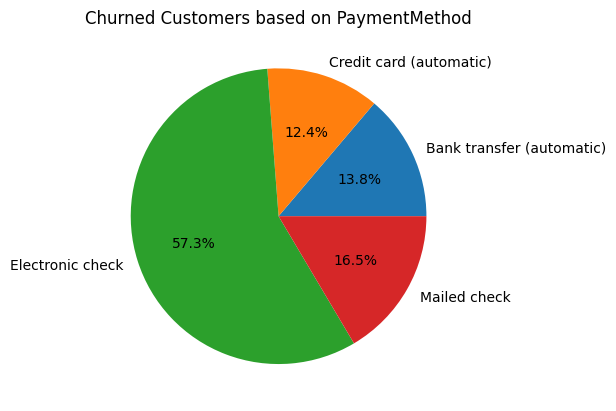

In [66]:
plt.pie(churned_cnt_based_on_is.Churnedcount,labels=churned_cnt_based_on_is.PaymentMethod, autopct='%1.1f%%')
plt.title('Churned Customers based on PaymentMethod')
plt.show()

Senior citizens are less likely to churn compared to non-senior citizens.

In [67]:
churned_cnt_based_on_Citizen= df[df['Churn'] == 'Yes'].groupby('SeniorCitizen').size().reset_index(name='Churnedcount')
churned_cnt_based_on_Citizen.head()

,SeniorCitizen,Churnedcount
0,0,1393
1,1,476


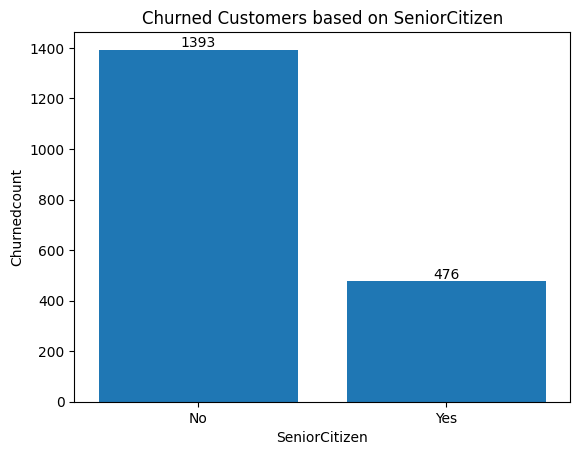

In [68]:
plt.bar(churned_cnt_based_on_Citizen.SeniorCitizen,churned_cnt_based_on_Citizen.Churnedcount,)
plt.title('Churned Customers based on SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Churnedcount')
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1], ['No', 'Yes'])
for i in range(len(churned_cnt_based_on_Citizen)):
    plt.text(churned_cnt_based_on_Citizen.SeniorCitizen[i], churned_cnt_based_on_Citizen.Churnedcount[i] + 10, 
             str(churned_cnt_based_on_Citizen.Churnedcount[i]), ha='center')

plt.show()

#Feature Engineering


C:\Users\PaluriManasa\AppData\Local\Temp\ipykernel_17348\35358758.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.replace({'Yes': 1, 'No': 0}, inplace=True)


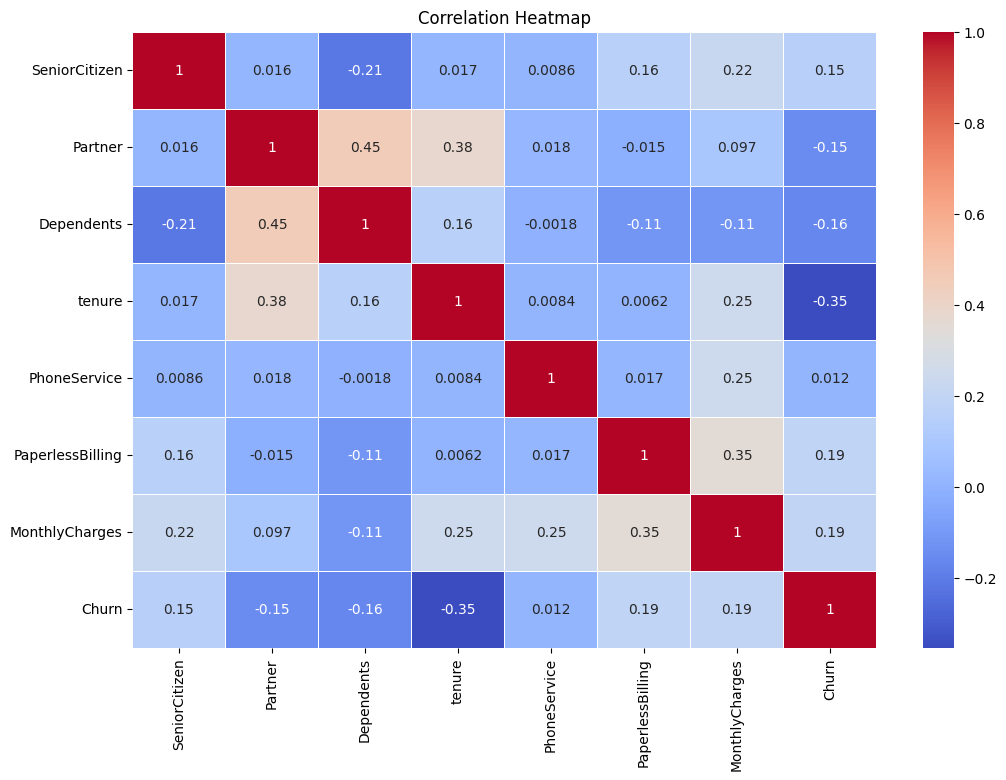

In [69]:

df_copy = df.copy()

# Replace 'Yes' and 'No' with 1 in the copy
df_copy.replace({'Yes': 1, 'No': 0}, inplace=True)

numeric_df = df_copy.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df.drop('customerID',axis=1,inplace =True)
df.drop('PaperlessBilling', axis=1, inplace=True) #low correlation with Churn
df.drop('Partner', axis=1 , inplace=True)#highly correlated with dependents
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,Male,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No
2,Male,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,Male,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


#FEATURE CREATION

In [71]:
bins = [0, 12, 24, 48, float('inf')]
labels = ['New Customer', 'Mid-Term Customer', 'Long-Term Customer', 'Loyal Customer']
df['tenure_category'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category
0,Female,0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,New Customer
1,Male,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No,Long-Term Customer
2,Male,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,New Customer
3,Male,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,Long-Term Customer
4,Female,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,New Customer


In [72]:
churned_customers_based_on_tenure_cat = df.groupby(['tenure_category','Churn']).size().unstack()
churned_customers_based_on_tenure_cat.head()

C:\Users\PaluriManasa\AppData\Local\Temp\ipykernel_17348\901700845.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_customers_based_on_tenure_cat = df.groupby(['tenure_category','Churn']).size().unstack()


Churn,No,Yes
tenure_category,,
New Customer,1070,999
Mid-Term Customer,738,309
Long-Term Customer,1285,339
Loyal Customer,2081,222


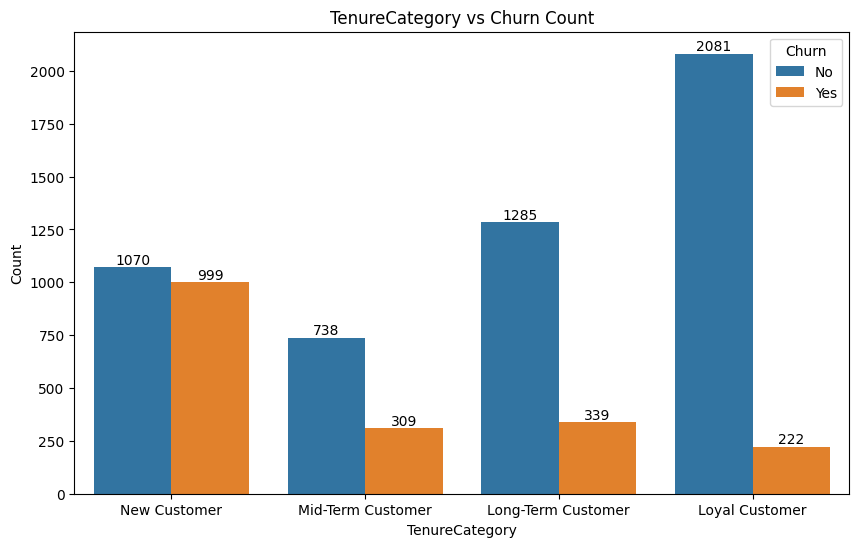

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='tenure_category', hue='Churn')
plt.title('TenureCategory vs Churn Count')
plt.xlabel('TenureCategory')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [74]:
df.sample(5)

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category
2206,Male,1,No,57,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Bank transfer (automatic),95.25,5427.05,Yes,Loyal Customer
1338,Male,0,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Mailed check,20.15,20.15,Yes,New Customer
4908,Female,1,No,28,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Electronic check,106.15,3152.5,Yes,Long-Term Customer
26,Male,0,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Electronic check,99.35,4749.15,Yes,Long-Term Customer
1350,Female,0,No,67,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Two year,Mailed check,65.65,4322.85,No,Loyal Customer


In [75]:
bins = [0, 50, 80, 100, float('inf')]
labels = ['Low Charges', 'Medium Charges', 'High Charges', 'Very High Charges']
df['Charges_paid_for_month'] = pd.cut(df['MonthlyCharges'], bins=bins, labels=labels, right=False)
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category,Charges_paid_for_month
0,Female,0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,New Customer,Low Charges
1,Male,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No,Long-Term Customer,Medium Charges
2,Male,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,New Customer,Medium Charges
3,Male,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,Long-Term Customer,Low Charges
4,Female,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,New Customer,Medium Charges


In [76]:
churned_customers_based_on_monthly_charges = df.groupby(['Charges_paid_for_month','Churn']).size().unstack()
churned_customers_based_on_monthly_charges.head()

C:\Users\PaluriManasa\AppData\Local\Temp\ipykernel_17348\954571091.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churned_customers_based_on_monthly_charges = df.groupby(['Charges_paid_for_month','Churn']).size().unstack()


Churn,No,Yes
Charges_paid_for_month,,
Low Charges,1933,361
Medium Charges,1474,598
High Charges,1116,653
Very High Charges,651,257


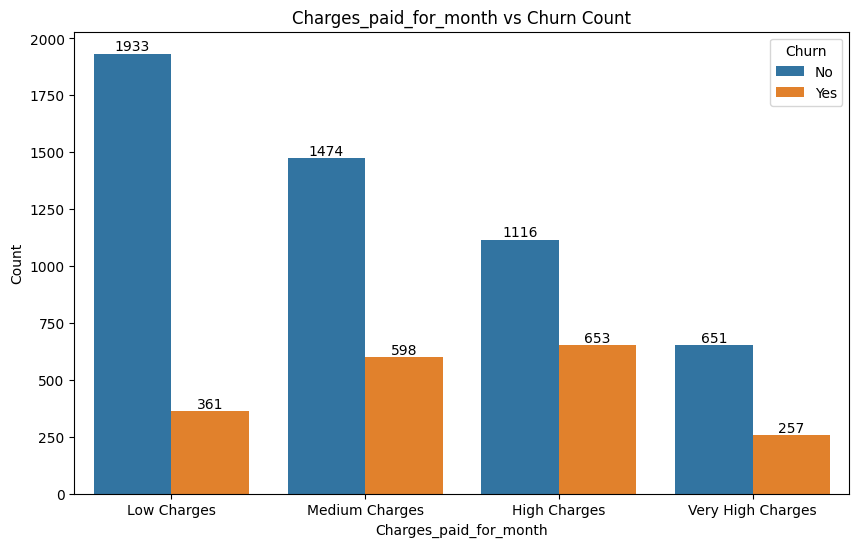

In [77]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Charges_paid_for_month', hue='Churn')
plt.title('Charges_paid_for_month vs Churn Count')
plt.xlabel('Charges_paid_for_month')
plt.ylabel('Count')
plt.legend(title='Churn')
for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [78]:
df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category,Charges_paid_for_month
0,Female,0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,New Customer,Low Charges
1,Male,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check,56.95,1889.5,No,Long-Term Customer,Medium Charges
2,Male,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,New Customer,Medium Charges
3,Male,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,Long-Term Customer,Low Charges
4,Female,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,New Customer,Medium Charges


In [81]:
df['Online_security_new'] = df['OnlineSecurity'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df['Online_Backup_new'] = df['OnlineBackup'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df['Device_protection_new'] = df['DeviceProtection'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df['Tech_support_new'] = df['TechSupport'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df['Multiple_lines_new'] = df['MultipleLines'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')
df.head

<bound method NDFrame.head of       gender  SeniorCitizen Dependents  tenure PhoneService     MultipleLines  \
0     Female              0         No       1           No  No phone service   
1       Male              0         No      34          Yes                No   
2       Male              0         No       2          Yes                No   
3       Male              0         No      45           No  No phone service   
4     Female              0         No       2          Yes                No   
...      ...            ...        ...     ...          ...               ...   
7038    Male              0        Yes      24          Yes               Yes   
7039  Female              0        Yes      72          Yes               Yes   
7040  Female              0        Yes      11           No  No phone service   
7041    Male              1         No       4          Yes               Yes   
7042    Male              0         No      66          Yes                No  

#Data encoding

In [82]:
encoder = LabelEncoder()
df['is_Online_security'] = encoder.fit_transform(df['Online_security_new'])
df['is_Online_backup'] = encoder.fit_transform(df['Online_Backup_new'])
df['is_Device_protection'] = encoder.fit_transform(df['Device_protection_new'])
df['is_Tech_support'] = encoder.fit_transform(df['Tech_support_new'])
df['is_Multiple_lines'] = encoder.fit_transform(df['Multiple_lines_new'])
df['Churn'] = encoder.fit_transform(df['Churn']) 
to_drop = ['Online_security_new','Online_Backup_new','Device_protection_new','Tech_support_new','Multiple_lines_new','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','tenure']
df.drop(to_drop,axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Dependents,PhoneService,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category,Charges_paid_for_month,is_Online_security,is_Online_backup,is_Device_protection,is_Tech_support,is_Multiple_lines
0,Female,0,No,No,DSL,No,No,Month-to-month,Electronic check,29.85,29.85,0,New Customer,Low Charges,0,1,0,0,0
1,Male,0,No,Yes,DSL,No,No,One year,Mailed check,56.95,1889.5,0,Long-Term Customer,Medium Charges,1,0,1,0,0
2,Male,0,No,Yes,DSL,No,No,Month-to-month,Mailed check,53.85,108.15,1,New Customer,Medium Charges,1,1,0,0,0
3,Male,0,No,No,DSL,No,No,One year,Bank transfer (automatic),42.30,1840.75,0,Long-Term Customer,Low Charges,1,0,1,1,0
4,Female,0,No,Yes,Fiber optic,No,No,Month-to-month,Electronic check,70.70,151.65,1,New Customer,Medium Charges,0,0,0,0,0


In [83]:
categorical_columns = ['InternetService','Contract']
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
one_hot_df = one_hot_df.astype(int)

In [84]:
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded.drop(['InternetService','Contract','StreamingTV','StreamingMovies',"TotalCharges", "MonthlyCharges"],axis=1,inplace=True)

In [85]:
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']    
X = pd.get_dummies(X, drop_first=True)

#Model Building and Training


In [ ]:
#KNN model

from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f'Classification Report - KNN:\n{class_report_knn}')
print(f'Accuracy - KNN: {accuracy_knn}')


Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1036
           1       0.58      0.53      0.55       373

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

Accuracy - KNN: 0.7735982966643009


In [ ]:
#AdaBoost model
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
class_report_ada = classification_report(y_test, y_pred_ada)

print(f'Classification Report - AdaBoost:\n{class_report_ada}')
print(f'Accuracy - AdaBoost: {accuracy_ada}')


Classification Report - AdaBoost:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Accuracy - AdaBoost: 0.808374733853797


In [89]:
#Logistic Regression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Classification Report - Logistic:\n{class_report}')

Classification Report - Logistic:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.82      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.81      0.75      0.77      1409



In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Classification Report - Random Forest:\n{class_report_rf}')
print(f'Accuracy - Random Forest: {accuracy_rf}')

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1036
           1       0.54      0.57      0.56       373

    accuracy                           0.76      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.76      0.76      0.76      1409

Accuracy - Random Forest: 0.7579843860894251


#HYPERPARAMETER -TUNING AND MODEL EVALUATION

In [ ]:
#Logistic Regression Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300]
}
log_model = LogisticRegression(class_weight='balanced')
grid_search = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_log_model = grid_search.best_estimator_
y_pred_log = best_log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
class_report_log = classification_report(y_test, y_pred_log)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


In [94]:
#Random Forest Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model =  RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.7912674684515865


In [98]:
#random forest model with best parameters and smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')



Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.7635786232015395


In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

# Initialize SMOTE and Random Forest Pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Nested Cross-Validation
outer_cv = 5
inner_cv = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')

# Perform nested cross-validation
nested_scores = cross_val_score(inner_cv, X, y, cv=outer_cv, scoring='accuracy', n_jobs=-1)

print(f'Nested Cross-Validation Scores: {nested_scores}')
print(f'Mean Nested Cross-Validation Score: {nested_scores.mean()}')


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\_utils.py", line 72, in __call__
    return self.func(**kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 598, in __call__
    return [func(*args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\parallel.py", line 139, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 562, in _fit
    self._validate_steps()
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\pipeline.py", line 339, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(random_state=42)' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py", line 1024, in fit
    self._run_search(evaluate_candidates)
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py", line 1571, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py", line 970, in evaluate_candidates
    out = parallel(
          ^^^^^^^^^
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 2007, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 1650, in _get_outputs
    yield from self._retrieve()
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 1754, in _retrieve
    self._raise_error_fast()
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 1789, in _raise_error_fast
    error_job.get_result(self.timeout)
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 745, in get_result
    return self._return_or_raise()
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\PaluriManasa\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\parallel.py", line 763, in _return_or_raise
    raise self._result
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'SMOTE(random_state=42)' (type <class 'imblearn.over_sampling._smote.base.SMOTE'>) doesn't
